# The Lorenz equations

(Exercise 8.3 from *Computational Physics* by Mark Newman, [ISBN-10: 1480145513](https://www.amazon.ca/dp/1480145513/))

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:
$$
\frac{dx}{dt} = \sigma(y-x),\qquad
\frac{dy}{dt} = rx - y - xz,\qquad
\frac{dz}{dt} = xy - bz,
$$
where $\sigma$, $r$, and~$b$ are constants.  (The names $\sigma$, $r$,
and~$b$ are odd, but traditional -- they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of **deterministic chaos**, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise 3.6.

#### Hint:
In part (e) you are asked to repeat part (b). You should *encapsulate* the functionality of part (a) in a function that accepts `integrator` as an argument and then use `odeint` in (a) and `rk4` in (d). This significantly reduces the amount of code that is copy/pasted -- an invitation for errors when the code is subsequently edited. 

In [2]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [18,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

####################33######## constants
sigma, r, b = 10.0, 28.0, 8/3 # parameters
x0, y0, z0 = 0,1,0            # initial conditions
T = 50.0                      # final time
N = 10000                      # number of time steps
############################### calculated constants
dt = T / N                    # time step
t = np.arange( 0, T, dt )     # times, $t_i, i=0...N-1$

### (a)

Read http://wiki.c2.com/?DontRepeatYourself and discuss, briefly,  **Don’t repeat yourself (DRY)** philosophy and how you can incorporate it into your own code.

Ans: The DRY philosophy is an ideology that programmers should not be excessive and repeatative when writing code. This will make debugging easier, as one would not have to screen lines and lines of code, in addition to making the code easier to understand from an outside perspective. Following the DRY philosophy would entail coders to pre-plan how to structure their scripts, spending the necessary time ahead to save time in the future. 


### (b)
Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=8/3$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.)
  
  #### also plot $x(t)$ and $z(t)$

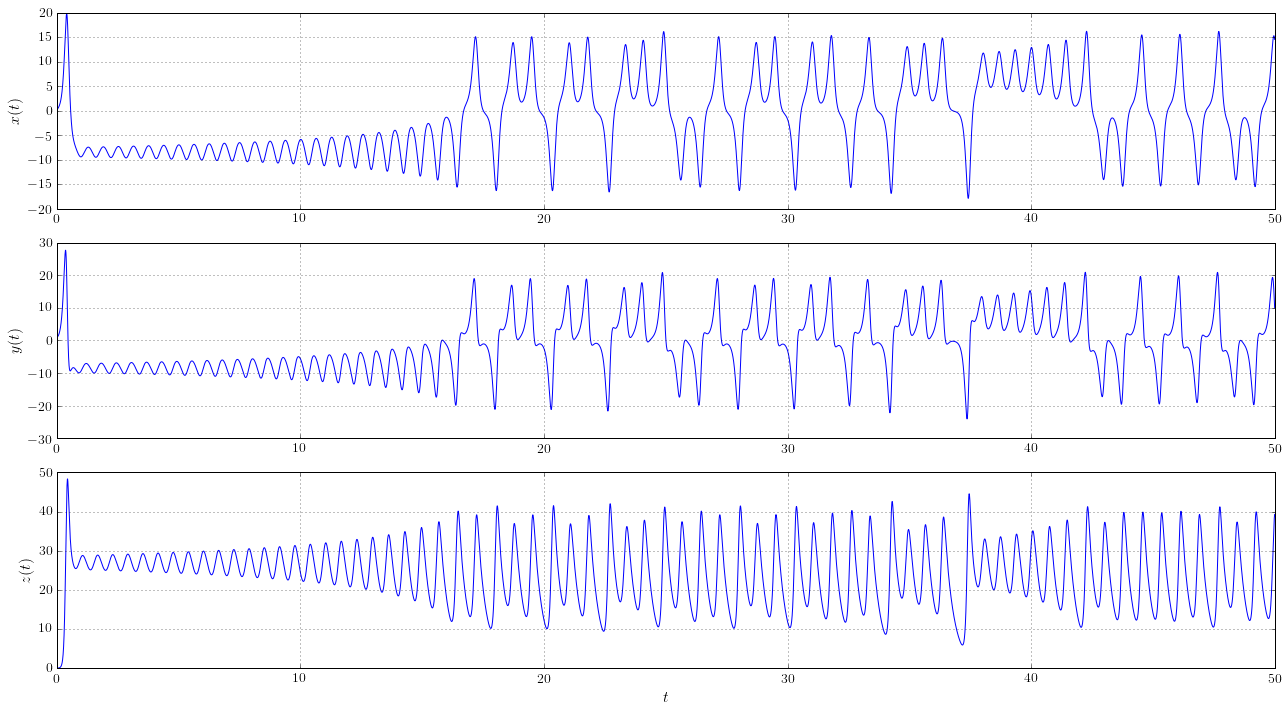

In [3]:
################################# time derivative of the state vector
def psidot( psi, t ) :          # returns $\dot{\vec{\psi}}$
    x,y,z = psi
    xdot = sigma*(y-x)
    ydot = r*x - y - x*z
    zdot = x*y - b*z
    psidot = np.array([xdot,ydot,zdot])
    return psidot

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot( 3, 1, 1 )
ax2 = fig.add_subplot( 3, 1, 2 ) 
ax3 = fig.add_subplot( 3, 1, 3 )

psi0 = 0,1,0
x,y,z = odeint(psidot,psi0,t).T

ax1.plot(t,x,label='$x(t)$')
ax2.plot(t,y,label='$y(t)$')
ax3.plot(t,z,label='$z(t)$')

# ax1.set_xlabel( '$t$' )
ax1.set_ylabel( '$x(t)$' )

# ax2.set_xlabel( '$t$' )
ax2.set_ylabel( '$y(t)$' )

ax3.set_xlabel( '$t$' )
ax3.set_ylabel( '$z(t)$' )

fig.tight_layout()



### (c)

Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous "strange attractor" of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.

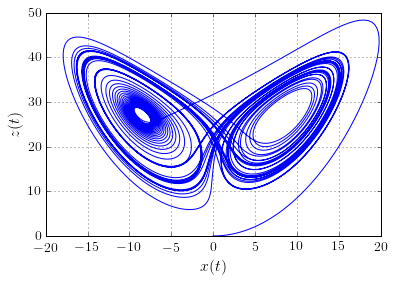

In [4]:
plt.figure()
plt.plot(x,z)
plt.xlabel( '$x(t)$' )
plt.ylabel( '$z(t)$' )




### (d)

Create a function, `rk4( psiDot, psi0, t )`, which implements the fourth-order Runge--Kutta method given by the algorithm:
\begin{align}
&
\psi_0 = \psi_\text{initial}
\\&
t_0 = 0
\\&
\text{for } i \text{ in } N
\\&\quad
    k_1 = \dot{\psi}(t_n, y_n),
\\&\quad
    k_2 = \dot{\psi}\left(t_n + \frac{h}{2}, \psi_n + h\frac{k_1}{2}\right),
\\&\quad
    k_3 = \dot{\psi}\left(t_n + \frac{h}{2}, \psi_n + h\frac{k_2}{2}\right), 
\\&\quad
    k_4 = \dot{\psi}\left(t_n + h, \psi_n + hk_3\right)
\\&\quad
    \psi_{n+1} = \psi_n + \tfrac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right),
\\&\quad
    t_{n+1} = t_n + h
\end{align}
which is a drop-in replacement for `scipy.integrate.odeint()` (ie, it accepts the same arguments and returns the same array).

Do **not** use `append` in your function; instead allocate an array full of zeros using

    psit = np.zeros( [ len(t), len( psi0 ) ] )
    
Make sure that your function will work when `psi0` is a 1D array.

In [5]:
def rk4( psidot, psi0, t ) :
    psit = np.zeros( [ len(t), len( psi0 ) ] )
    x0,y0,z0 = psi0
    psit[0] = x0,y0,z0
    h = dt
    for i in range(N-1):
        k1 = psidot(psit[i],t[i])
        k2 = psidot(psit[i] + h*k1/2, t[i] + h/2)
        k3 = psidot(psit[i] + h*k2/2, t[i] + h/2)
        k4 = psidot(psit[i] + h*k3, t[i] + h)
        
        psit[i+1] = psit[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t[i+1] = t[i] + h
    # perform some calculations here
    return psit


### (e)

Re-do part (b) using `rk4()`. Use the same `psiDot()` from part (b).

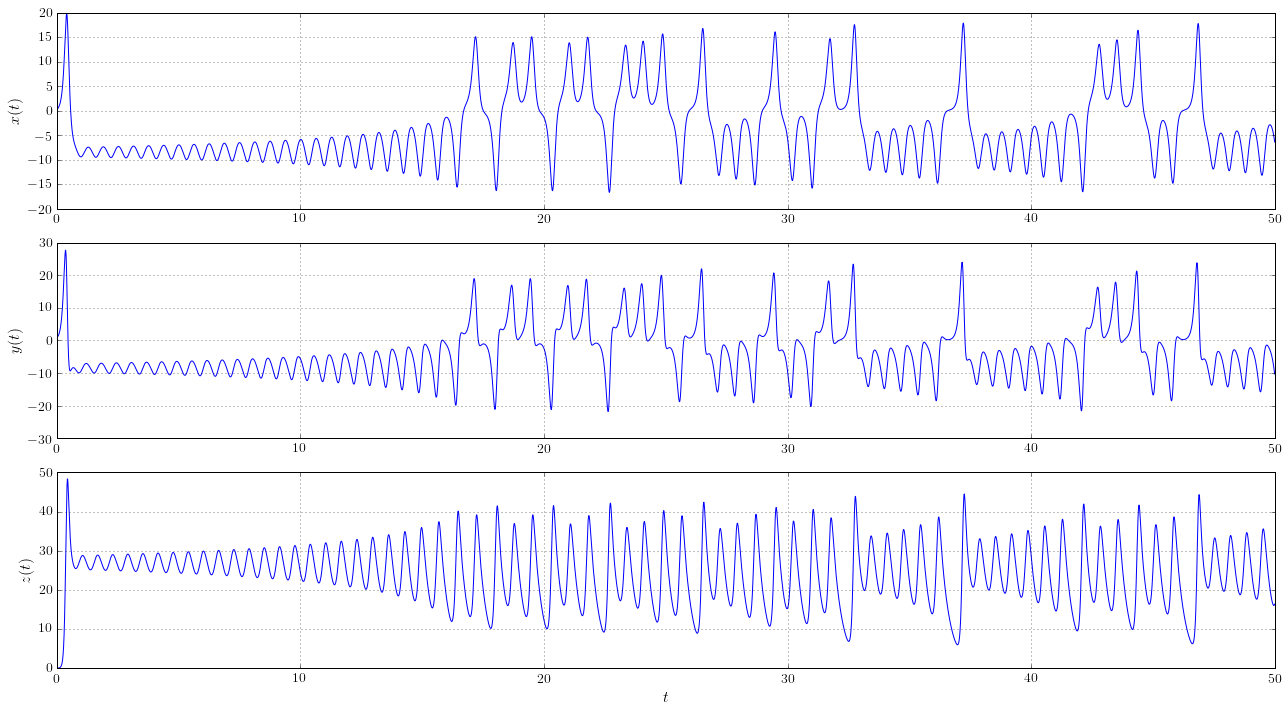

In [8]:
x,y,z = rk4(psidot,psi0,t).T

fig2 = plt.figure(figsize=(18,10))
ax1 = fig2.add_subplot( 3, 1, 1 )
ax2 = fig2.add_subplot( 3, 1, 2 ) 
ax3 = fig2.add_subplot( 3, 1, 3 )


ax1.plot(t,x,label='$x(t)$')
ax2.plot(t,y,label='$y(t)$')
ax3.plot(t,z,label='$z(t)$')

#ax1.set_xlabel( '$t$' )
ax1.set_ylabel( '$x(t)$' )

#ax2.set_xlabel( '$t$' )
ax2.set_ylabel( '$y(t)$' )

ax3.set_xlabel( '$t$' )
ax3.set_ylabel( '$z(t)$' )

fig2.tight_layout()

### (f)

Re-do part (b) using `rk4()`. Use the same `psiDot()` from part (a).

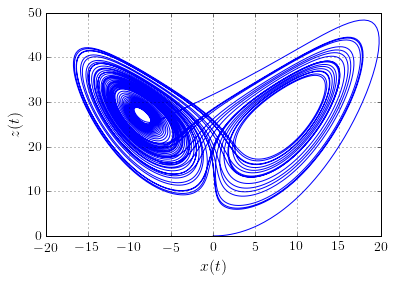

In [9]:
plt.figure()
plt.plot(x,z)
plt.xlabel( '$x(t)$' )
plt.ylabel( '$z(t)$' )